## Sine curve test
### This notebook shows how to import da_rnn_from_csv.py to use the da_rnn class.  (WARNING: the training takes about 20 minutes to run on a 2016 Macbook Pro)

### The notebook cells do the following:  
1. Create ocillating values using np.sin;
2. Save a DataFrame with 2 columns;  
 * x_vals = degrees from 0 to 36000, 4 degrees spacing
 * y_vals = np.sin(x_vals * np.pi / 180)
3. Name the column with the y_values "close";
4. Save the DataFrame to data/sin_vals.csv;
5. Run da_rnn_from_csv.main using 5000 rows;
6. Plot the y_act values vs y_pred values to show that they align.

### Imports

In [1]:
import pandas as pd
import sys,os
import numpy as np
import pandas as pd
import da_rnn_from_csv as drfc

### Create csv

In [2]:
noise_level = .1
x_vals = np.linspace(0,360*100,360*100/4 + 1)
y_vals = np.sin(x_vals*np.pi/180)
y_vals = y_vals + np.random.randn(len(y_vals)) * noise_level
df = pd.DataFrame({'x_vals':x_vals,'close':y_vals})
df.to_csv('data/sin_vals.csv',index=False)

/Users/bperlman1/Virtualenvs3/pyliverisk/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


### Run the da_rnn model

2019-03-27 15:32:11,912 - VOC_TOPICS - INFO - Shape of data: (5000, 3).
Missing in data: 0.
2019-03-27 15:32:11,919 - VOC_TOPICS - INFO - Training size: 3500.
2019-03-27 15:32:11,920 - VOC_TOPICS - INFO - Is CUDA available? False.
2019-03-27 15:32:11,921 - VOC_TOPICS - INFO - Iterations per epoch: 28.
/Users/bperlman1/Virtualenvs3/pyliverisk/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/Users/bperlman1/Documents/billybyte/pyliverisk/jupyter_notebooks/da_rnn/da_rnn_from_csv.py:236: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a_e_k = F.softmax(v_e_k) # batch_size, input_size
/Users/bperlman1/Documents/billybyte/pyliverisk/jupyter_notebooks/da_rnn/da_rnn_from_csv.py:352: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the ca

['close' 'x_vals'] (9001, 2)
moving the close column to the label_column


/Users/bperlman1/Documents/billybyte/pyliverisk/jupyter_notebooks/da_rnn/da_rnn_from_csv.py:513: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return loss.data[0]
2019-03-27 15:32:22,341 - VOC_TOPICS - INFO - Epoch 0, loss: 0.363.


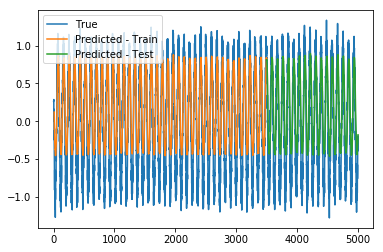

2019-03-27 15:34:11,023 - VOC_TOPICS - INFO - Epoch 10, loss: 0.017.


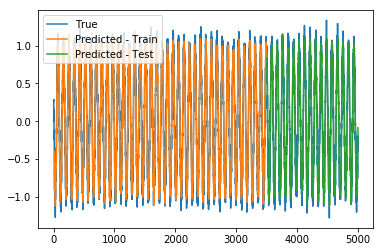

2019-03-27 15:36:00,594 - VOC_TOPICS - INFO - Epoch 20, loss: 0.016.


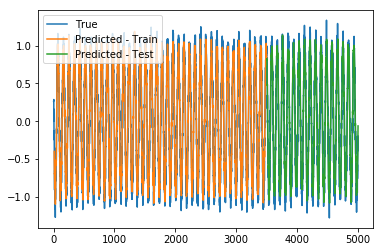

2019-03-27 15:37:47,771 - VOC_TOPICS - INFO - Epoch 30, loss: 0.016.


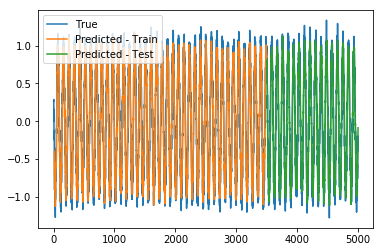

2019-03-27 15:39:31,700 - VOC_TOPICS - INFO - Epoch 40, loss: 0.016.


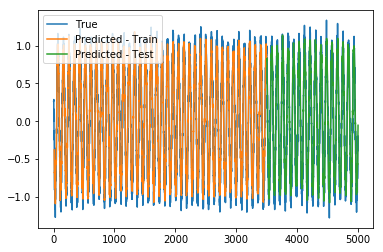

2019-03-27 15:41:17,722 - VOC_TOPICS - INFO - Epoch 50, loss: 0.016.


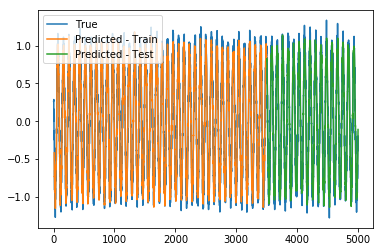

2019-03-27 15:43:04,333 - VOC_TOPICS - INFO - Epoch 60, loss: 0.016.


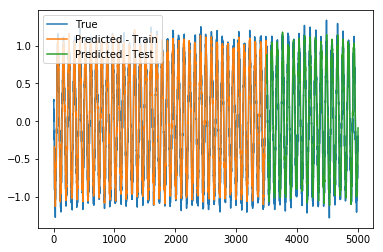

2019-03-27 15:44:50,816 - VOC_TOPICS - INFO - Epoch 70, loss: 0.016.


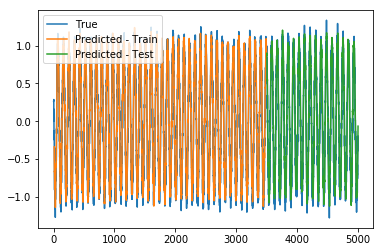

2019-03-27 15:46:37,375 - VOC_TOPICS - INFO - Epoch 80, loss: 0.016.


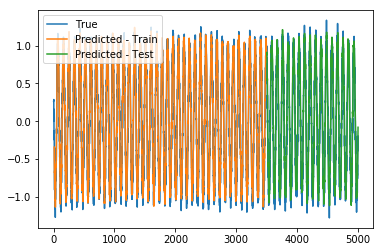

2019-03-27 15:48:23,732 - VOC_TOPICS - INFO - Epoch 90, loss: 0.016.


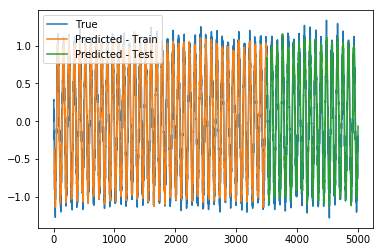

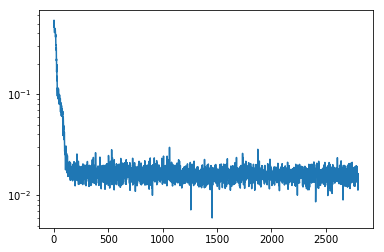

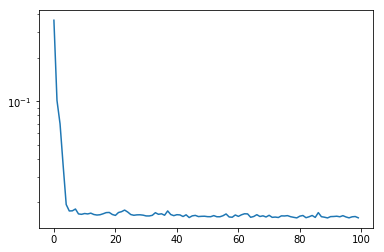

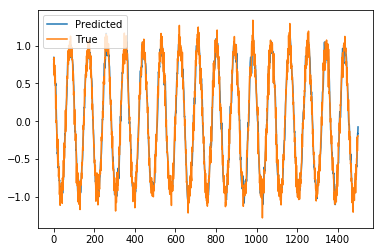

mean predicted price from pred_df: -0.013062, mean predicted price from model.predict: -0.008641


In [3]:
fname_no_ext = 'sin_vals'
rows_to_use = 5000
return_dict = drfc.main(FILE_NAME_NO_EXTENSION=fname_no_ext,subset_rows=rows_to_use)
df_partial = return_dict['dataframe']
m = return_dict['model']


### Plot a zoomed in portion of the DataFrame that compares y_act with y_pred

1500 1500 1500


/Users/bperlman1/Virtualenvs3/pyliverisk/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


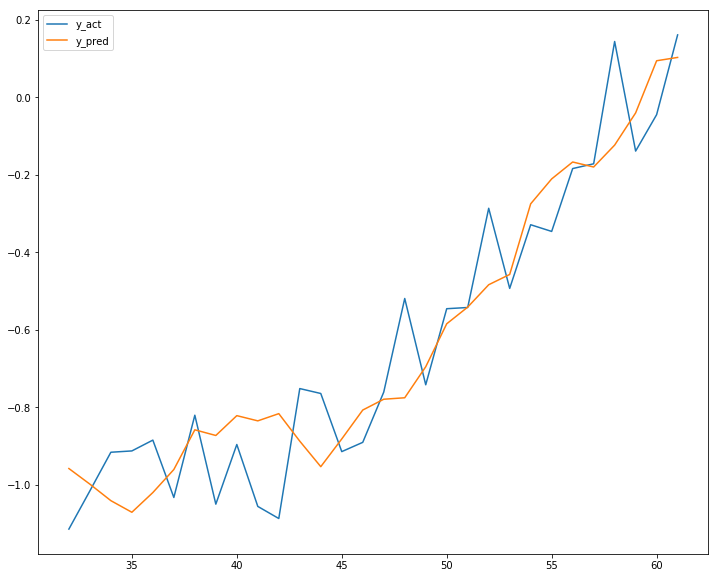

In [6]:
test_size = return_dict['test_size']
y_act = m.y[-1*test_size:]
y_pred = return_dict['y_pred'][-1 * test_size:]
print(test_size,len(y_act),len(y_pred))
df_review = pd.DataFrame({'y_act':y_act,'y_pred':y_pred})

num_to_view = 30

beg_index = 32
end_index = beg_index+num_to_view
df_review.iloc[beg_index:end_index].plot(y=['y_act','y_pred'],figsize=(12,10))

In [5]:
df_review.iloc[beg_index:end_index]

,y_act,y_pred
32,-1.113985,-0.957683
33,-1.015345,-0.997975
34,-0.915657,-1.040612
35,-0.912261,-1.070568
36,-0.884360,-1.019691
37,-1.032392,-0.960223
38,-0.820096,-0.857759
39,-1.049645,-0.872395
40,-0.895683,-0.821186
41,-1.055471,-0.834666
